<a href="https://colab.research.google.com/github/Ricanky/AluraStore/blob/main/AluraStoreLatam_RicardoMagdaleno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [ ]:
tienda['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

# Unimos todos en un solo DataFrame
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Verificamos
df_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08,Tienda 1
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56,Tienda 1
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51,Tienda 1
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52,Tienda 1
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56,Tienda 1


#1. Análisis de facturación



In [ ]:
# Agrupar por tienda y sumar los precios
ingresos_por_tienda = df_total.groupby('tienda')['Precio'].sum()

# Mostrar resultados
print("Ingresos totales por tienda:")
print(ingresos_por_tienda)

Ingresos totales por tienda:
tienda
Tienda 1   1,150,880,400.00
Tienda 2   1,116,343,500.00
Tienda 3   1,098,019,600.00
Tienda 4   1,038,375,700.00
Name: Precio, dtype: float64


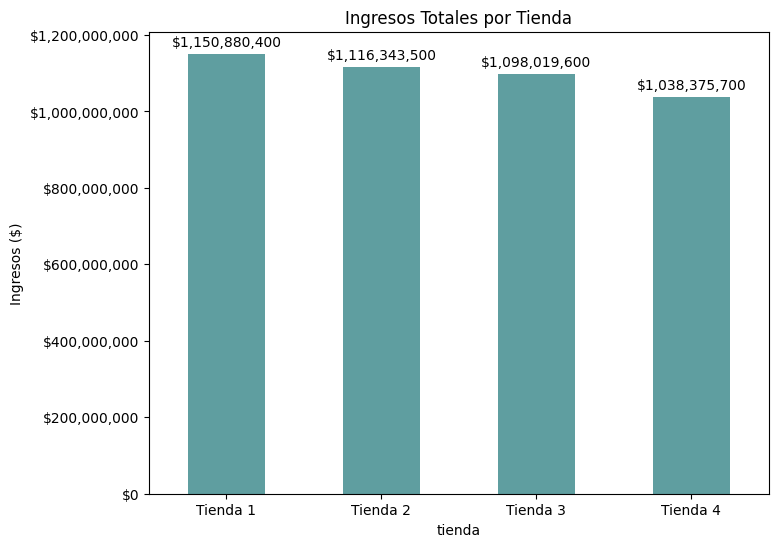

In [ ]:
import matplotlib.ticker as mticker
ax = ingresos_por_tienda.plot(
    kind='bar',                # tipo de gráfico: barras
    title='Ingresos Totales por Tienda',   # título del gráfico
    ylabel='Ingresos ($)',      # etiqueta del eje Y
    color='cadetblue',            # color de las barras
    figsize=(8, 6)              # tamaño de la figura (opcional)
)

plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
formatter = mticker.FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', label_type='edge', padding=3)
plt.show()

Uno de los indicadores más importantes al evaluar en qué tienda debería vender el Sr. Juan es el monto total facturado por cada tienda. Para ello, se agruparon los datos por tienda y se sumaron los precios de los productos vendidos.

El análisis reveló lo siguiente:

Tienda 1: $1,150,880,400

Tienda 2: $1,116,343,500

Tienda 3: $1,098,019,600

Tienda 4: $1,038,375,700

Como se observa en el gráfico de barras generado, la Tienda 1 presenta el mayor volumen de facturación, superando ligeramente a la Tienda 2 y con una ventaja más marcada respecto a la Tienda 4, que ocupa el último lugar. Este dato sugiere que la Tienda 1 tiene un mayor flujo de ventas o vende productos de mayor valor, lo cual representa una oportunidad atractiva para el Sr. Juan en términos de potencial de ingresos.

No obstante, es importante considerar que este factor por sí solo no es determinante, ya que deben analizarse otros elementos como la satisfacción del cliente, el coste logístico y la rotación de productos para tomar una decisión integral.

# 2. Ventas por categoría

In [ ]:
ventas_categoria_tienda1 = df_total[df_total['tienda'] == 'Tienda 1']['Categoría del Producto'].value_counts()
ventas_categoria_tienda2 = df_total[df_total['tienda'] == 'Tienda 2']['Categoría del Producto'].value_counts()
ventas_categoria_tienda3 = df_total[df_total['tienda'] == 'Tienda 3']['Categoría del Producto'].value_counts()
ventas_categoria_tienda4 = df_total[df_total['tienda'] == 'Tienda 4']['Categoría del Producto'].value_counts()


In [ ]:
ventas_categorias = pd.DataFrame({
    'Tienda 1': ventas_categoria_tienda1,
    'Tienda 2': ventas_categoria_tienda2,
    'Tienda 3': ventas_categoria_tienda3,
    'Tienda 4': ventas_categoria_tienda4
}).fillna(0)


In [ ]:
ventas_categorias.astype(int)


,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Electrónicos,448,422,451,451
Instrumentos musicales,182,224,177,170
Juguetes,324,313,315,338
Libros,173,197,185,187
Muebles,465,442,499,480


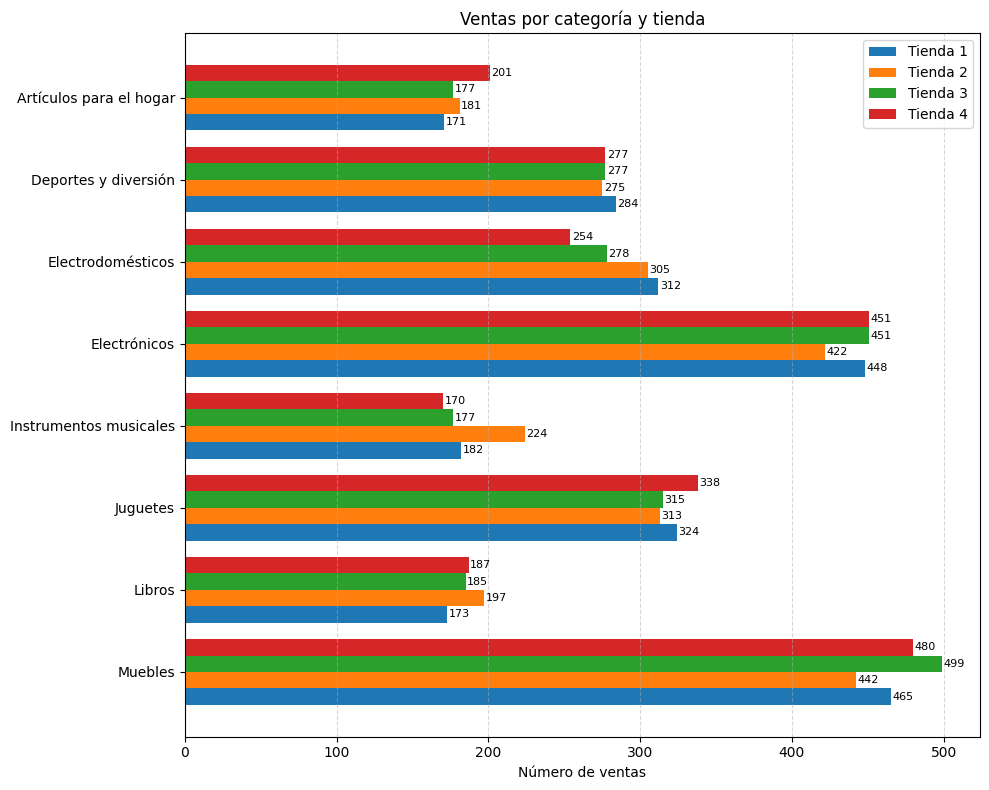

In [ ]:
import matplotlib.pyplot as plt

# Acomodamos los datos
ventas_categorias_plot = ventas_categorias.astype(int)[::-1]
categorias = ventas_categorias_plot.index
ancho_barra = 0.2
pos = range(len(categorias))

plt.figure(figsize=(10, 8))

# Dibujamos una barra por tienda (desplazadas horizontalmente)
bars1 = plt.barh([p + ancho_barra*0 for p in pos], ventas_categorias_plot['Tienda 1'], height=ancho_barra, label='Tienda 1')
bars2 = plt.barh([p + ancho_barra*1 for p in pos], ventas_categorias_plot['Tienda 2'], height=ancho_barra, label='Tienda 2')
bars3 = plt.barh([p + ancho_barra*2 for p in pos], ventas_categorias_plot['Tienda 3'], height=ancho_barra, label='Tienda 3')
bars4 = plt.barh([p + ancho_barra*3 for p in pos], ventas_categorias_plot['Tienda 4'], height=ancho_barra, label='Tienda 4')

# Agregar los valores al final de cada barra
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        plt.text(width + 1, y, str(int(width)), va='center', fontsize=8)

# Etiquetas y formato
plt.yticks([p + ancho_barra*1.5 for p in pos], categorias)
plt.xlabel('Número de ventas')
plt.title('Ventas por categoría y tienda')
plt.legend()
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


Además de analizar los ingresos totales, es fundamental examinar el comportamiento de ventas por categoría de producto. Esto permite identificar en qué tipo de productos cada tienda tiene mayor o menor rotación, lo cual puede ser clave para una estrategia de ventas efectiva.

El gráfico muestra el número de ventas por categoría en cada tienda. A continuación, se destacan algunos hallazgos relevantes:

Categorías con mayor volumen de ventas:

Muebles y Electrónicos son las categorías más vendidas en general, especialmente en la Tienda 3 (499 muebles) y en las Tiendas 3 y 4 (451 electrónicos cada una).

Tienda 1 también tiene un desempeño sólido en Electrónicos (448) y Muebles (465).

Categorías con menor volumen de ventas:

Instrumentos musicales presenta el número más bajo de ventas en todas las tiendas, particularmente en la Tienda 4 (170).

Artículos para el hogar también muestra cifras moderadamente bajas, aunque Tienda 4 lidera esta categoría con 201 ventas.

Desempeño por tienda:

Tienda 3 lidera en la categoría de Muebles, mientras que Tienda 4 es muy competitiva en varias categorías, incluyendo Juguetes, Artículos para el hogar y Electrónicos.

Tienda 1, si bien no lidera en todas, tiene una participación fuerte y consistente en la mayoría de las categorías clave.

Este análisis indica que las tiendas tienen fortalezas diferenciadas por categoría. Tienda 3 sobresale en muebles, mientras que Tiendas 1 y 4 destacan en electrónicos y juguetes. Esta información puede orientar al Sr. Juan a priorizar productos de categorías con mayor demanda en la tienda que elija, maximizando así su potencial de ventas.

# 3. Calificación promedio de la tienda


In [ ]:
calificaciones_promedio = df_total.groupby('tienda')['Calificación'].mean()

In [ ]:
calificaciones_promedio

,Calificación
tienda,
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


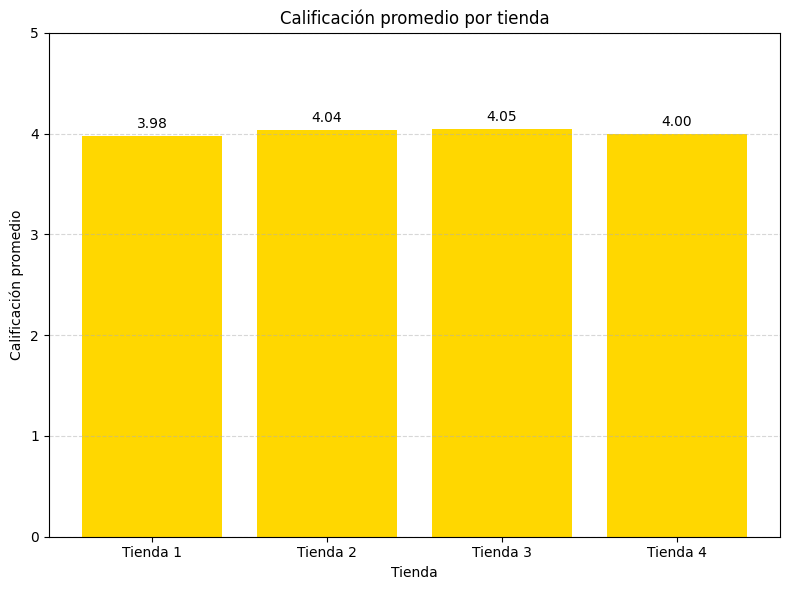

In [ ]:
plt.figure(figsize=(8, 6))
barras = plt.bar(calificaciones_promedio.index, calificaciones_promedio.values, color='gold')

plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.ylim(0, 5)

for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 0.05, f'{altura:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

La percepción del cliente es un aspecto clave al evaluar el desempeño de una tienda. Las calificaciones promedio reflejan la experiencia general de los compradores y pueden influir directamente en la fidelización y en las probabilidades de futuras ventas.

Al calcular el promedio de las calificaciones otorgadas por los clientes en cada tienda, se obtuvieron los siguientes resultados:

Tienda 3: 4.05

Tienda 2: 4.04

Tienda 4: 4.00

Tienda 1: 3.98

Aunque las diferencias entre tiendas no son extremas, Tienda 3 presenta la mejor calificación promedio, seguida muy de cerca por la Tienda 2. Esto puede indicar una mayor satisfacción por parte de los clientes en esas tiendas, lo cual es positivo para cualquier vendedor interesado en mantener una buena reputación y experiencia de compra.

Por otro lado, Tienda 1, a pesar de liderar en ingresos totales, tiene la calificación más baja entre las cuatro. Esto podría señalar algunos aspectos a mejorar en términos de servicio, calidad o logística, factores que el Sr. Juan debería considerar si da prioridad a vender en un entorno con alta satisfacción del cliente.

# 4. Productos más y menos vendidos

In [ ]:
ventas_productos = df_total.groupby(['tienda', 'Producto']).size().reset_index(name='ventas')

productos_destacados = []

for tienda in ventas_productos['tienda'].unique():
    df_tienda = ventas_productos[ventas_productos['tienda'] == tienda]
    producto_mas_vendido = df_tienda.loc[df_tienda['ventas'].idxmax()]
    producto_menos_vendido = df_tienda.loc[df_tienda['ventas'].idxmin()]

    productos_destacados.append({
        'Tienda': tienda,
        'Más vendido': producto_mas_vendido['Producto'],
        'Ventas más': producto_mas_vendido['ventas'],
        'Menos vendido': producto_menos_vendido['Producto'],
        'Ventas menos': producto_menos_vendido['ventas']
    })

import pandas as pd
resumen_productos = pd.DataFrame(productos_destacados)
print(resumen_productos)


     Tienda                Más vendido  Ventas más              Menos vendido  \
0  Tienda 1                    Armario          60  Auriculares con micrófono   
1  Tienda 2  Iniciando en programación          65              Juego de mesa   
2  Tienda 3              Kit de bancas          57    Bloques de construcción   
3  Tienda 4                   Cama box          62         Guitarra eléctrica   

   Ventas menos  
0            33  
1            32  
2            35  
3            33  


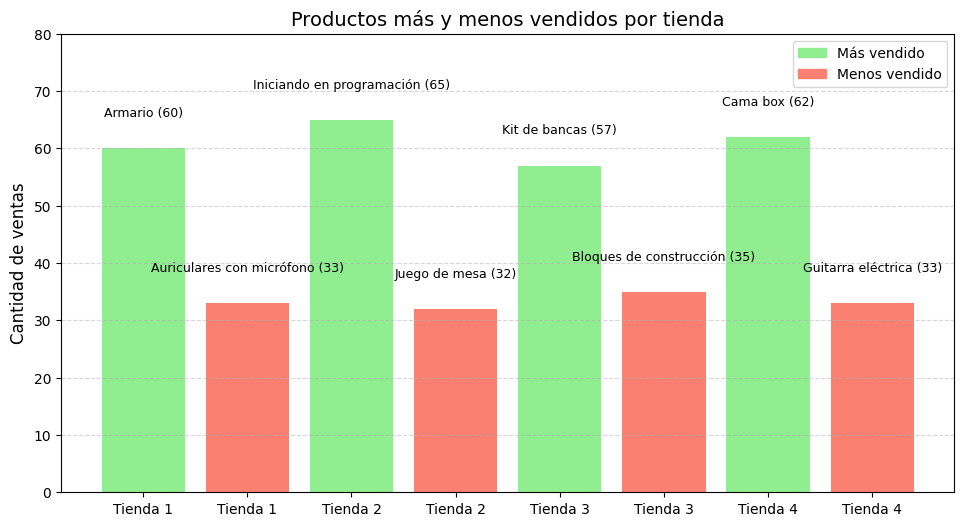

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Crear listas para etiquetas, valores, colores y productos
etiquetas_tienda = []
valores = []
colores = []
productos_texto = []

for i, row in resumen_productos.iterrows():
    # Más vendido
    etiquetas_tienda.append(f"{row['Tienda']}")
    valores.append(row['Ventas más'])
    colores.append('lightgreen')
    productos_texto.append(row['Más vendido'])

    # Menos vendido
    etiquetas_tienda.append(f"{row['Tienda']}")
    valores.append(row['Ventas menos'])
    colores.append('salmon')
    productos_texto.append(row['Menos vendido'])

# Crear la gráfica con un tamaño más pequeño
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura aquí
barras = plt.bar(range(len(valores)), valores, color=colores)

# Agregar etiquetas con el nombre del producto + valor encima de cada barra
for i, barra in enumerate(barras):
    texto = f"{productos_texto[i]} ({valores[i]})"
    plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height() + 5,
             texto, ha='center', va='bottom', fontsize=9)

# Eje X con solo los nombres de tienda repetidos
plt.xticks(range(len(etiquetas_tienda)), etiquetas_tienda, rotation=0)

# Título y formato
plt.title('Productos más y menos vendidos por tienda', fontsize=14)  # Ajusta el tamaño del título
plt.ylabel('Cantidad de ventas', fontsize=12)

# Ajustar el espacio superior para evitar que las etiquetas de las barras se tapen con el título
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.85)  # Aquí agregamos espacio extra arriba

# Ajustar el límite del eje Y para que vaya hasta 70
plt.ylim(0, 80)  # Ajustamos el límite superior del eje Y

plt.grid(axis='y', linestyle='--', alpha=0.5)

# Leyenda manual
leyenda_verde = mpatches.Patch(color='lightgreen', label='Más vendido')
leyenda_roja = mpatches.Patch(color='salmon', label='Menos vendido')
plt.legend(handles=[leyenda_verde, leyenda_roja])

plt.show()


# 5. Envío promedio por tienda

In [ ]:
envio_stats = df_total.groupby('tienda')['Costo de envío'].agg(['mean', 'sum']).reset_index()
envio_stats.columns = ['Tienda', 'Envío Promedio', 'Envío Total']

print(envio_stats)

     Tienda  Envío Promedio   Envío Total
0  Tienda 1       26,018.61 61,377,900.00
1  Tienda 2       25,216.24 59,485,100.00
2  Tienda 3       24,805.68 58,516,600.00
3  Tienda 4       23,459.46 55,317,400.00


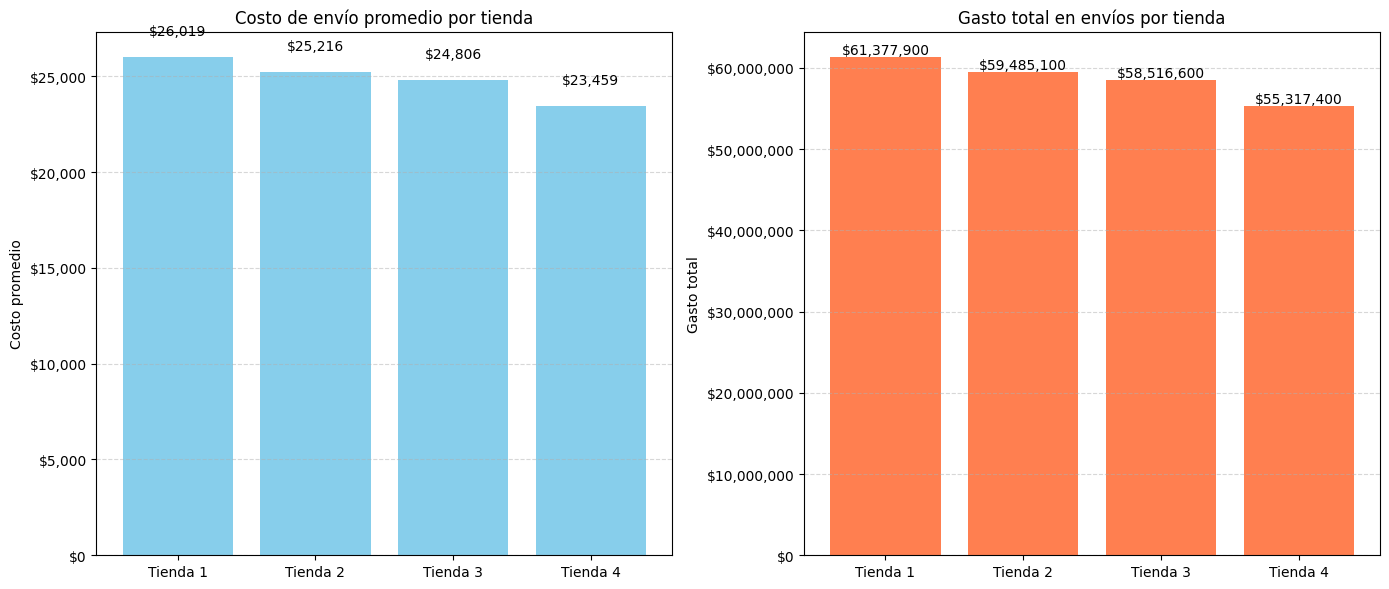

In [ ]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Formateador para el eje Y con separador de miles
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)

# Gráfica 1: Envío promedio
ax[0].bar(envio_stats['Tienda'], envio_stats['Envío Promedio'], color='skyblue')
ax[0].set_title('Costo de envío promedio por tienda')
ax[0].set_ylabel('Costo promedio')
ax[0].grid(axis='y', linestyle='--', alpha=0.5)
for i, valor in enumerate(envio_stats['Envío Promedio']):
    ax[0].text(i, valor + 1000, f"${valor:,.0f}", ha='center', va='bottom')

# Gráfica 2: Envío total
ax[1].bar(envio_stats['Tienda'], envio_stats['Envío Total'], color='coral')
ax[1].set_title('Gasto total en envíos por tienda')
ax[1].set_ylabel('Gasto total')
ax[1].grid(axis='y', linestyle='--', alpha=0.5)
for i, valor in enumerate(envio_stats['Envío Total']):
    ax[1].text(i, valor + 5000, f"${valor:,.0f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

El análisis de los costos de envío permite conocer no solo cuánto gasta cada tienda en logística, sino también qué tan eficiente es ese gasto en relación con la cantidad de ventas realizadas.

Costo Promedio de Envío por Venta
Tienda 1: $26,018.61

Tienda 2: $25,216.24

Tienda 3: $24,805.68

Tienda 4: $23,459.46

La Tienda 4 tiene el costo promedio más bajo, lo que indica una gestión de envíos más eficiente o acuerdos logísticos más favorables. En cambio, la Tienda 1 presenta el costo más alto por envío.

Gasto Total en Envíos
Tienda 1: $61,377,900

Tienda 2: $59,485,100

Tienda 3: $58,516,600

Tienda 4: $55,317,400

Aunque los gastos totales en envío son similares entre tiendas, nuevamente destaca la Tienda 4 como la que incurre en menor gasto total, lo que puede representar una ventaja competitiva para el Sr. Juan si busca maximizar utilidades.

En resumen, si bien todas las tiendas operan con costos elevados en logística, la Tienda 4 logra mantener los costos más controlados tanto a nivel individual como total, lo cual es relevante al momento de tomar una decisión de inversión o de ubicación de un nuevo punto de venta.

     tienda    Ingreso Total   Envío Total     Ingreso Neto
0  Tienda 1 1,150,880,400.00 61,377,900.00 1,089,502,500.00
1  Tienda 2 1,116,343,500.00 59,485,100.00 1,056,858,400.00
2  Tienda 3 1,098,019,600.00 58,516,600.00 1,039,503,000.00
3  Tienda 4 1,038,375,700.00 55,317,400.00   983,058,300.00


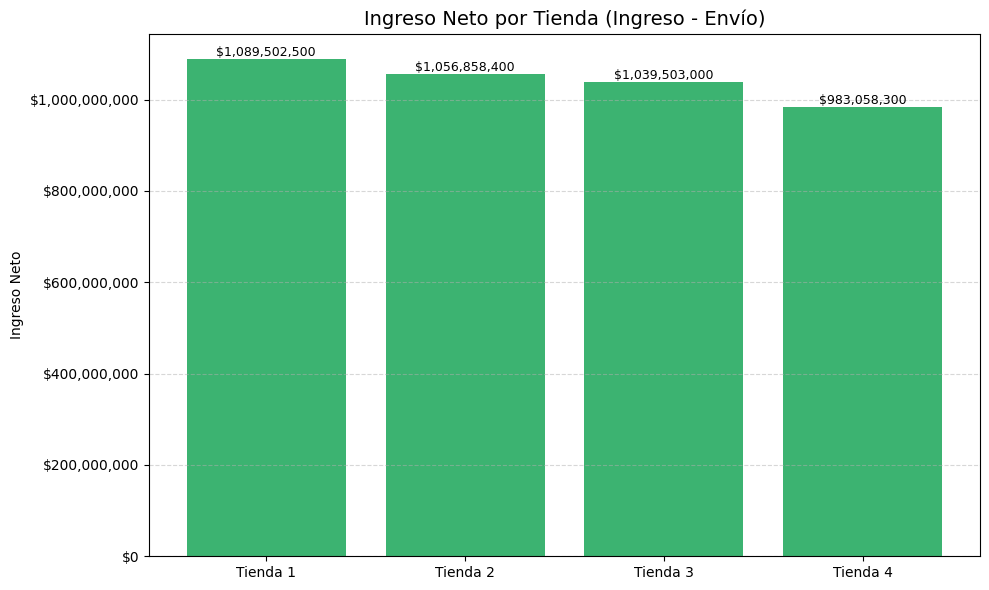

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Agrupamos ingresos y costos por tienda
ingresos_por_tienda = df_total.groupby('tienda')['Precio'].sum().reset_index(name='Ingreso Total')
envios_por_tienda = df_total.groupby('tienda')['Costo de envío'].sum().reset_index(name='Envío Total')

# Combinamos ambos
df_ingreso_neto = ingresos_por_tienda.merge(envios_por_tienda, on='tienda')
df_ingreso_neto['Ingreso Neto'] = df_ingreso_neto['Ingreso Total'] - df_ingreso_neto['Envío Total']

# Mostrar tabla
print(df_ingreso_neto)

# Gráfica
plt.figure(figsize=(10, 6))
bars = plt.bar(df_ingreso_neto['tienda'], df_ingreso_neto['Ingreso Neto'], color='mediumseagreen')

# Formato del eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Título y etiquetas
plt.title('Ingreso Neto por Tienda (Ingreso - Envío)', fontsize=14)
plt.ylabel('Ingreso Neto')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Etiquetas encima de cada barra
for i, bar in enumerate(bars):
    valor = df_ingreso_neto['Ingreso Neto'][i]
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50000,
             f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Al evaluar los costos logísticos es fundamental considerar también el impacto que estos tienen sobre los ingresos netos. El ingreso neto se calcula restando el gasto total en envíos del ingreso total por ventas.

Costos Promedio y Totales de Envío
Tienda 1:

Costo promedio de envío: $26,018.61

Gasto total en envíos: $61,377,900

Tienda 2:

Costo promedio de envío: $25,216.24

Gasto total en envíos: $59,485,100

Tienda 3:

Costo promedio de envío: $24,805.68

Gasto total en envíos: $58,516,600

Tienda 4:

Costo promedio de envío: $23,459.46

Gasto total en envíos: $55,317,400

Aunque la Tienda 4 es la más eficiente en términos de envío (menor costo promedio y total), esto no necesariamente se traduce en mayor rentabilidad.

Ingreso Neto por Tienda
Tienda 1: $1,089,502,500

Tienda 2: $1,056,858,400

Tienda 3: $1,039,503,000

Tienda 4: $983,058,300

La Tienda 1, a pesar de tener el envío más caro, logra el mayor ingreso neto, lo que sugiere que sus altos costos logísticos se ven compensados por un volumen y valor de ventas muy elevado. En contraste, la Tienda 4, aunque es la más eficiente en costos de envío, obtiene el ingreso neto más bajo.

#  Análisis Geográfico

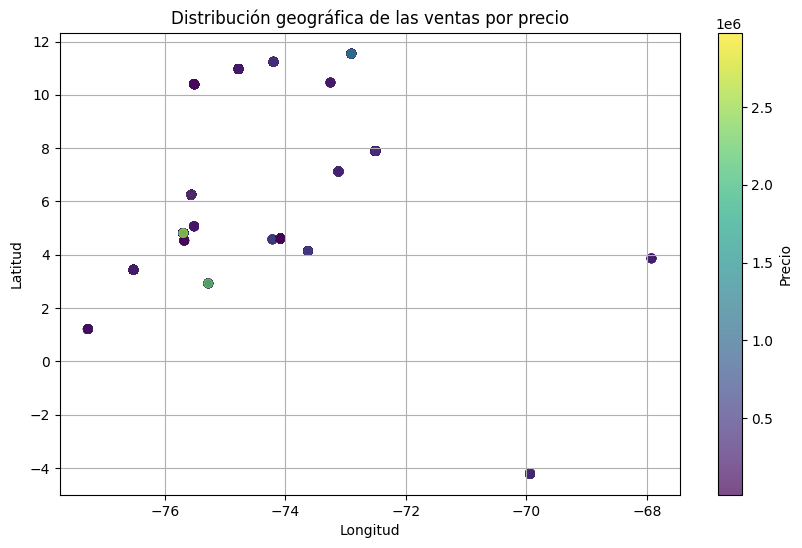

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_total['lon'], df_total['lat'],
                      c=df_total['Precio'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Precio')
plt.title('Distribución geográfica de las ventas por precio')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


## Distribución geográfica de las ventas por precio
En este gráfico de dispersión se muestra la ubicación geográfica de las tiendas según su latitud y longitud, con una codificación de color basada en el valor de las ventas. Aunque aún no es posible identificar ubicaciones específicas, se observa una concentración de puntos con valores de ventas moderados, mientras que unos pocos puntos sobresalen con precios significativamente más altos, lo que sugiere zonas con mayor capacidad de compra o mejor desempeño comercial.

In [ ]:
pip install folium

In [ ]:
import folium
from folium.plugins import HeatMap

# Mapa base centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=5)

# Crear lista de puntos [lat, lon, peso]
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_total.iterrows()]

# Agregar HeatMap
HeatMap(heat_data, radius=15).add_to(mapa)

# Mostrar mapa
mapa


## Mapa de calor de ventas por ubicación
El mapa de calor permite identificar claramente las zonas geográficas con mayor densidad de ventas. Se evidencia un punto rojo brillante que destaca significativamente sobre el resto del territorio, indicando una alta concentración de actividad comercial. Esta zona corresponde a Bogotá, la capital del país, lo cual es consistente con su papel como principal centro económico. También se detectan otras áreas de actividad moderada como Medellín, Cali y la costa atlántica.

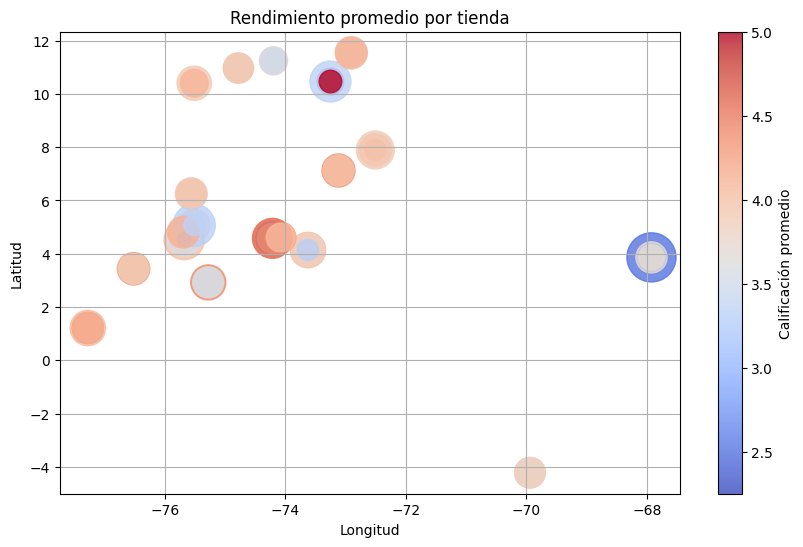

In [ ]:
agrupado = df_total.groupby(['tienda', 'lat', 'lon'])[['Precio', 'Calificación']].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(agrupado['lon'], agrupado['lat'],
            s=agrupado['Precio'] / 1000,
            c=agrupado['Calificación'],
            cmap='coolwarm', alpha=0.8)
plt.colorbar(label='Calificación promedio')
plt.title('Rendimiento promedio por tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


## Rendimiento promedio por tienda
Este gráfico refleja el rendimiento de las tiendas en función de su calificación promedio, representada tanto por el tamaño como por el color de los círculos. Las tiendas con mejor calificación se agrupan en colores más cálidos (rojo) y tamaños mayores. Se puede ver que una de las tiendas mejor calificadas también se encuentra en la zona central del país, reforzando la hipótesis de que las tiendas ubicadas en zonas con alta actividad comercial también tienden a tener mejor desempeño en términos de satisfacción del cliente.



# Conclusión General del Análisis
Luego de analizar los datos de las cuatro tiendas del Sr. Juan —considerando ingresos totales y netos, ventas por categoría, calificaciones de los clientes, productos más y menos vendidos, costos de envío y análisis geográfico— se concluye que la tienda con menor desempeño general es la Tienda 4.

## Justificación de la Recomendación
- Ingresos: La Tienda 4 registró los ingresos más bajos tanto a nivel bruto ($1,038,375,700.00) como neto ($983,058,300.00), lo que indica una menor rentabilidad respecto a las otras tiendas.

- Ventas por categoría: Aunque tuvo un buen desempeño en algunas categorías, en otras como Electrodomésticos e Instrumentos musicales quedó por debajo de las demás.

- Calificación de clientes: Su calificación promedio (4.00) es aceptable, pero no sobresale frente a las otras tiendas.

- Productos vendidos: Si bien el producto más vendido tuvo un volumen competitivo, el menos vendido no muestra una ventaja significativa respecto a otras tiendas.

- Costos de envío: Aunque presenta el costo de envío promedio más bajo, esta ventaja no compensa su baja rentabilidad general.

- Ubicación: Según el análisis geográfico, la Tienda 4 parece tener una menor concentración de ventas en comparación con las otras, lo que puede deberse a una ubicación menos estratégica.

## Recomendación Final
Se recomienda al Sr. Juan dejar de vender en la Tienda 4, ya que representa la operación con menor rendimiento financiero y comercial. Las demás tiendas tienen un mejor equilibrio entre ingresos, volumen de ventas, evaluación del cliente y localización geográfica, por lo que deberían mantenerse activas.